<a href="https://colab.research.google.com/github/toraaglobal/SREIT/blob/master/02_OBTAIN_AND_EXPLORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#from mpl_toolkits.basemap import Basemap
import json
from fbprophet import Prophet


%matplotlib inline

In [4]:
## OBTAIN


#Mount the gdrive
import os
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
## OBTAIN

## Read metro data

df_metro = pd.read_csv('group_by_metro.csv')
df_metro.head()

,Unnamed: 0,Date,Metro,SizeRank,Values
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [6]:
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213900 entries, 0 to 213899
Data columns (total 5 columns):
Unnamed: 0    213900 non-null int64
Date          213900 non-null object
Metro         213900 non-null object
SizeRank      213900 non-null float64
Values        204805 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.2+ MB


In [0]:
df_metro['Date'] = pd.to_datetime(df_metro['Date'])

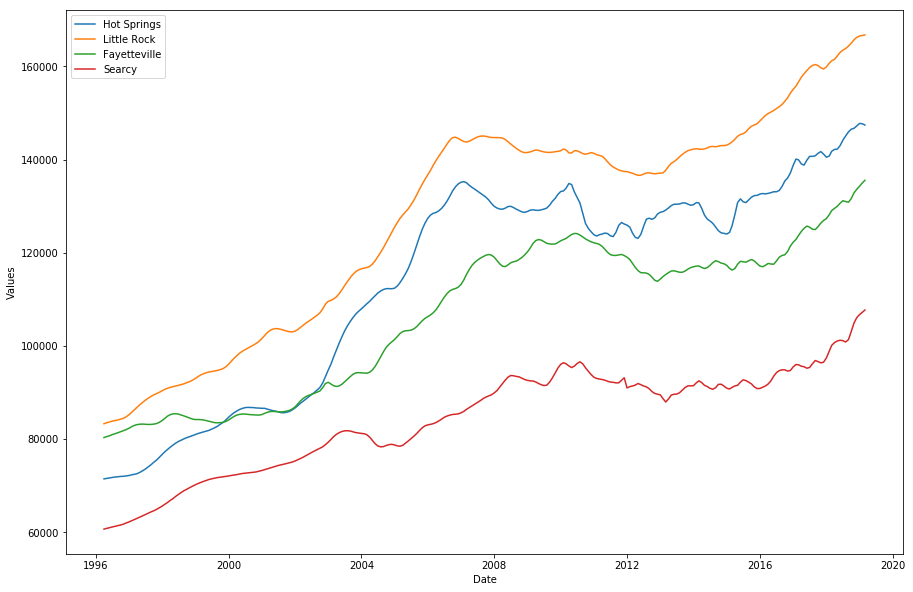

In [10]:
## Explore
plt.figure(figsize=(15,10))
ax = sns.lineplot('Date', 'Values', label = 'Hot Springs',data= df_metro.query("Metro == 'Hot Springs'"))
ax = sns.lineplot('Date', 'Values', label = 'Little Rock',data= df_metro.query("Metro == 'Little Rock-North Little Rock-Conway'"))
ax = sns.lineplot('Date', 'Values', label = 'Fayetteville',data= df_metro.query("Metro == 'Fayetteville'"))
ax = sns.lineplot('Date', 'Values', label = 'Searcy',data= df_metro.query("Metro == 'Searcy'"))
plt.show()

In [8]:
##
df_metro.head()

,Unnamed: 0,Date,Metro,SizeRank,Values
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [11]:

# SCRUB
# Rename column for clarity

df_metro = df_metro.rename(index=str, columns={"Date": "ds", "Values":"y"})
df_metro.head()

,Unnamed: 0,ds,Metro,SizeRank,y
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [12]:

# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

model = Prophet(interval_width=0.95)
model.fit(df_metro[df_metro['Metro'] == 'Hot Springs'])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:

future_dates = model.make_future_dataframe(periods=10, freq='m')
future_dates.tail()

,ds
281,2019-08-31
282,2019-09-30
283,2019-10-31
284,2019-11-30
285,2019-12-31


In [14]:

# MODEL

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
281,2019-08-31,148369.249465,144055.461935,152248.956323
282,2019-09-30,149377.395433,145634.531435,153657.431160
283,2019-10-31,150060.541750,146281.962528,153784.357123
284,2019-11-30,149955.886740,145965.594716,153742.390764
285,2019-12-31,149704.469413,145534.132514,153875.604109


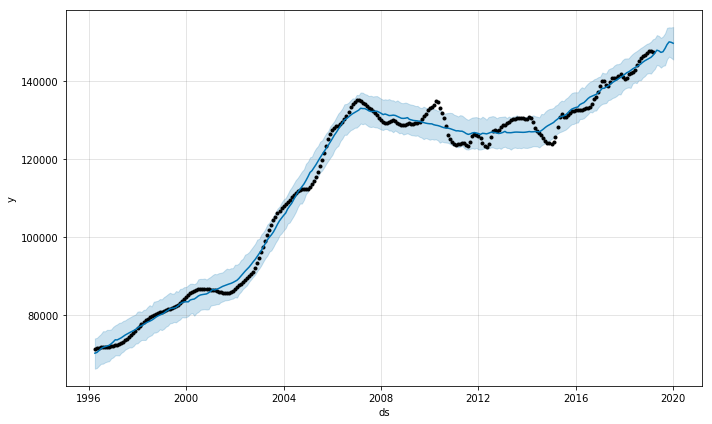

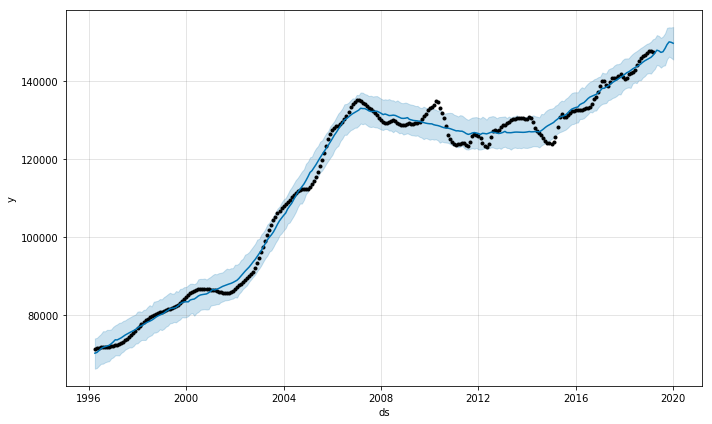

In [15]:
# MODEL

model.plot(forecast, uncertainty=True)

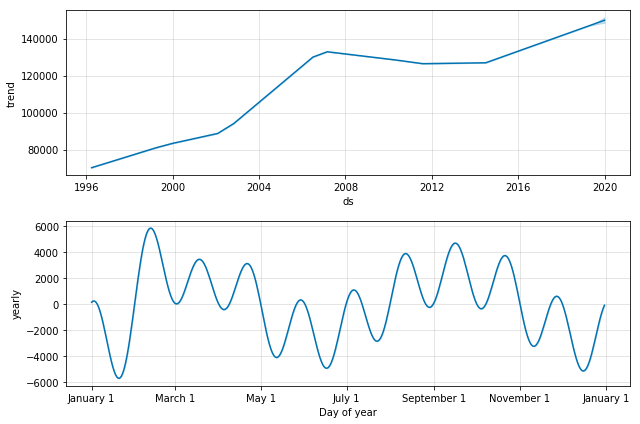

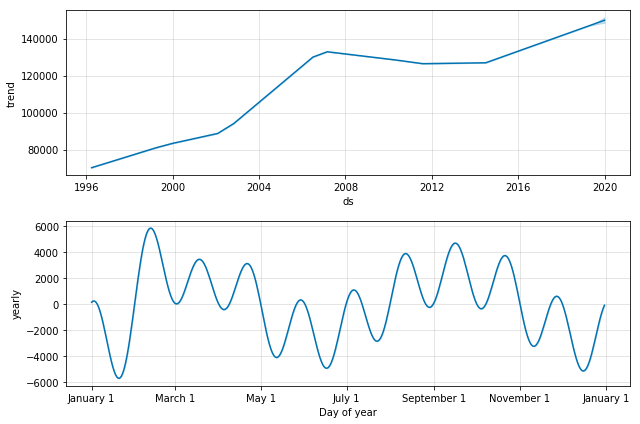

In [16]:

# INTERPRET

model.plot_components(forecast)

In [0]:
def run_prophet(df):
  print('='*50)
  print("Fitting Model")
  print("="*50)
  model = Prophet(interval_width=0.95)
  model.fit(df)
  print("="*50)
  print("Predicting future dates in an interval of 10 at a monthly frequency")
  print("="*50)
  future_dates = model.make_future_dataframe(periods=10, freq='m')
  print("="*50)
  print("Tail of the feature dates")
  print(future_dates.tail())
  print("="*50)
  print("Forcasting")
  forecast = model.predict(future_dates)
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
  print("="*50)
  model.plot(forecast, uncertainty=True)
  plt.show()
  print("="*50)
  print("INTERPRET")
  model.plot_components(forecast)
  plt.show()
  

In [18]:
## get metro
metro = df_metro['Metro'].unique()
metro = list(metro)
metro[:5]

['Aberdeen', 'Abilene', 'Ada', 'Adrian', 'Akron']

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Aberdeen Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  196288.345931  181928.782437  210777.801508
282 2019-09-30  198424.709750  184914.567079  211528.313704
283 2019-10-31  199964.357883  185422.264486  212806.152506
284 2019-11-30  200258.339813  185851.779224  215044.682407
285 2019-12-31  199948.716574  186075.106707  213907.416158


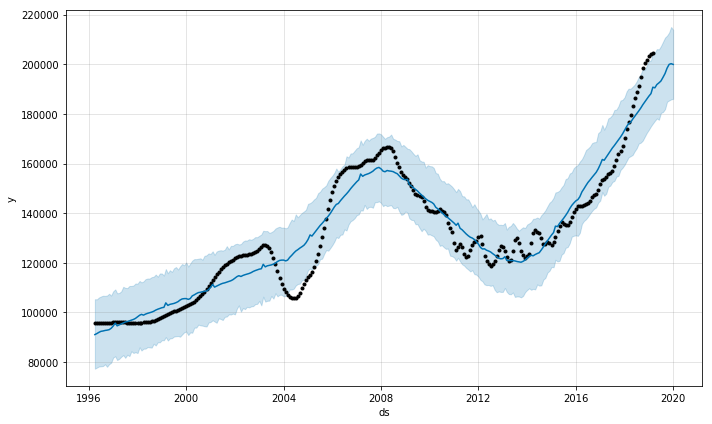

INTERPRET


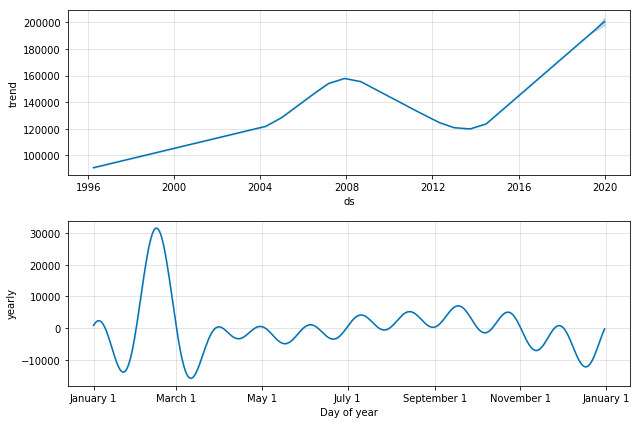

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Abilene Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  138076.291437  136603.766433  139799.569550
282 2019-09-30  139016.316667  137328.880135  140588.449403
283 2019-10-31  139632.951719  137686.782496  141433.704623
284 2019-11-30  139791.103918  137715.323669  141805.775826
285 2019-12-31  139975.504195  137581.421131  142059.318166


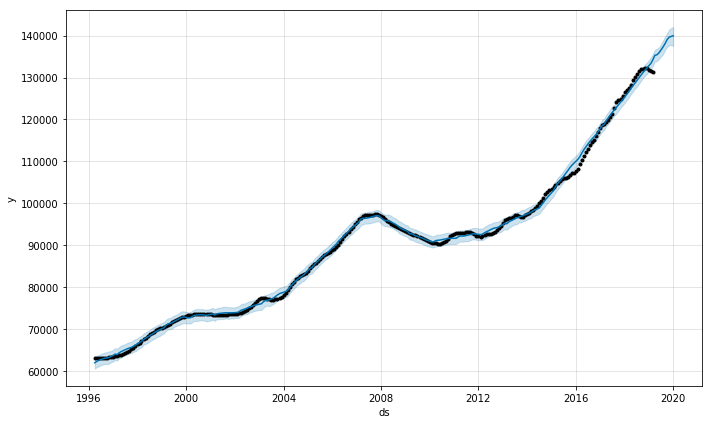

INTERPRET


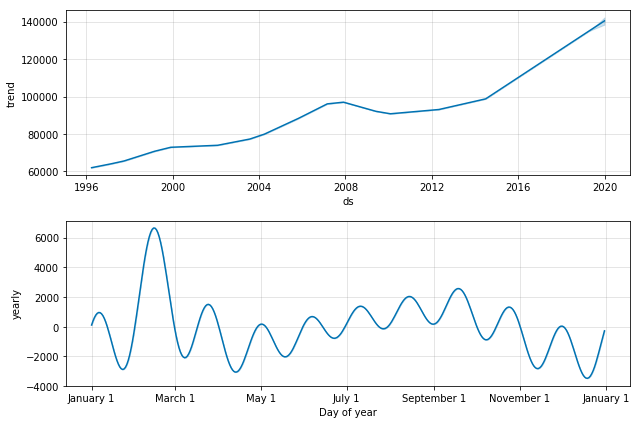

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Ada Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat    yhat_lower     yhat_upper
281 2019-08-31  100513.549363  96140.738196  105214.164820
282 2019-09-30  100947.305898  96373.358191  105368.499447
283 2019-10-31  100969.836868  96543.478921  105323.626124
284 2019-11-30  101069.969663  96600.284520  105384.699866
285 2019-12-31  101351.151958  96883.414959  106026.126617


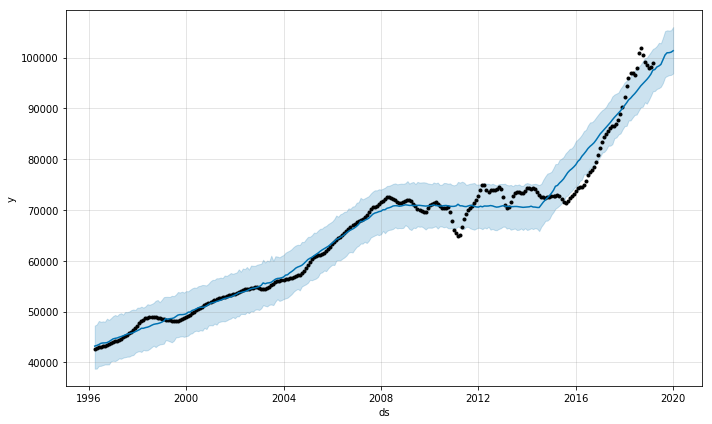

INTERPRET


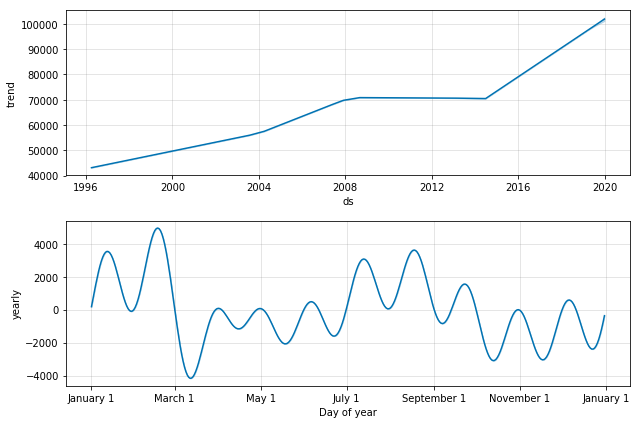

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Adrian Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  149763.750981  141515.916534  157620.881121
282 2019-09-30  150583.411503  142608.753717  158187.660012
283 2019-10-31  150835.690958  143510.196073  158468.803909
284 2019-11-30  150705.086046  142058.538523  158355.332779
285 2019-12-31  150710.634475  142922.641474  158792.263857


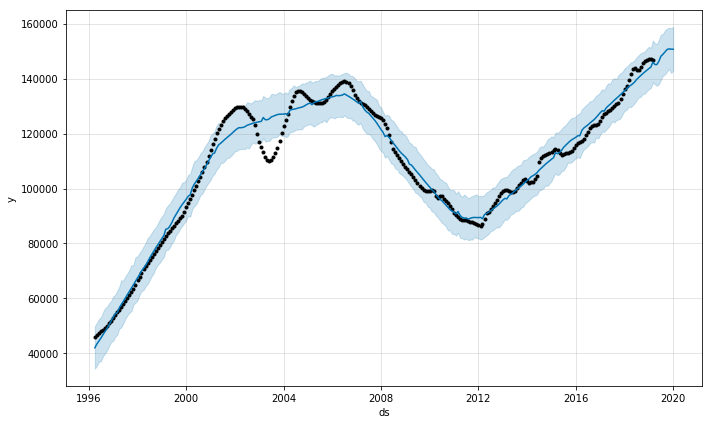

INTERPRET


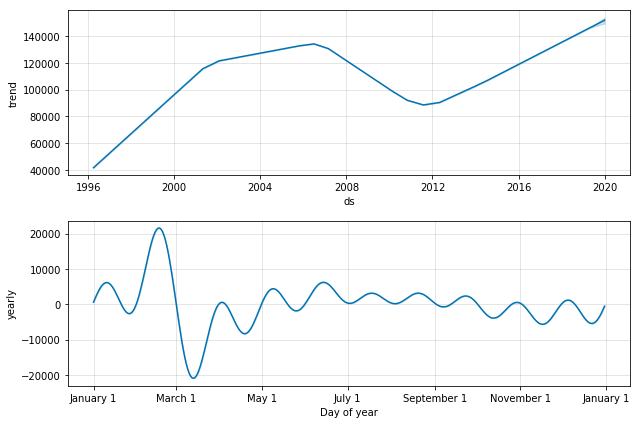

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Akron Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  163931.562853  161518.552751  166311.947380
282 2019-09-30  164581.172045  162248.793777  167020.152129
283 2019-10-31  165072.101041  162854.679124  167663.632394
284 2019-11-30  165292.119664  162814.757458  167916.658672
285 2019-12-31  165450.627019  162852.086406  167880.116949


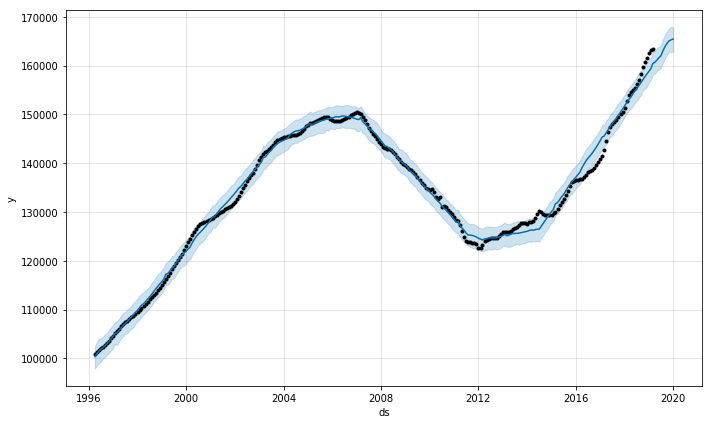

INTERPRET


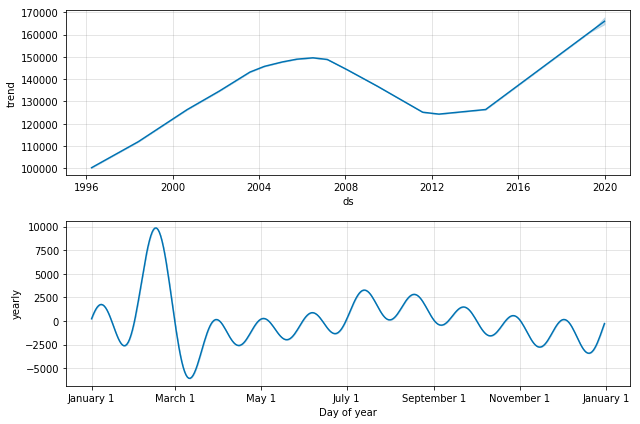

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Alamogordo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  97003.048365  90084.509668  104002.891448
282 2019-09-30  97255.117198  89521.439670  104851.029257
283 2019-10-31  97331.497026  89921.209540  104676.023803
284 2019-11-30  97212.864103  89936.784403  104707.988597
285 2019-12-31  96835.267352  89238.875053  104747.043959


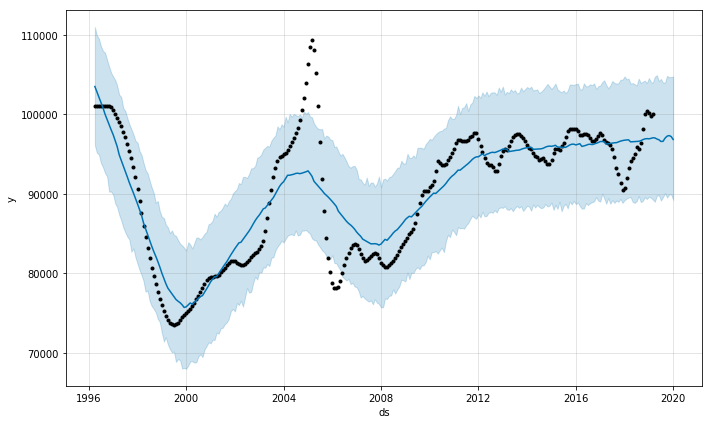

INTERPRET


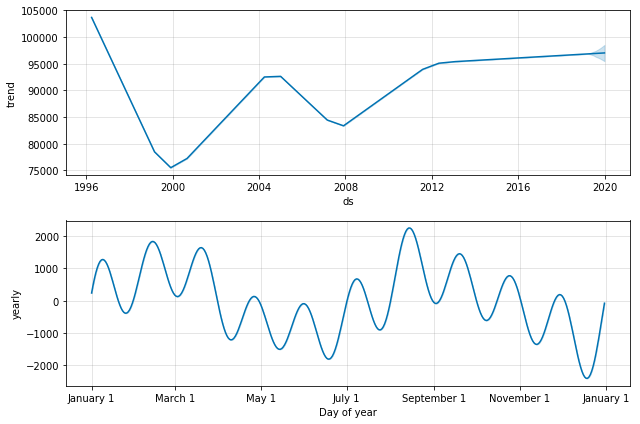

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albany Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  201259.409583  197613.467745  204911.062204
282 2019-09-30  202399.356240  198575.961538  206047.344268
283 2019-10-31  203483.191234  199788.686844  207164.365350
284 2019-11-30  204588.306277  200353.739945  208530.140030
285 2019-12-31  205863.626715  201242.561127  209930.278984


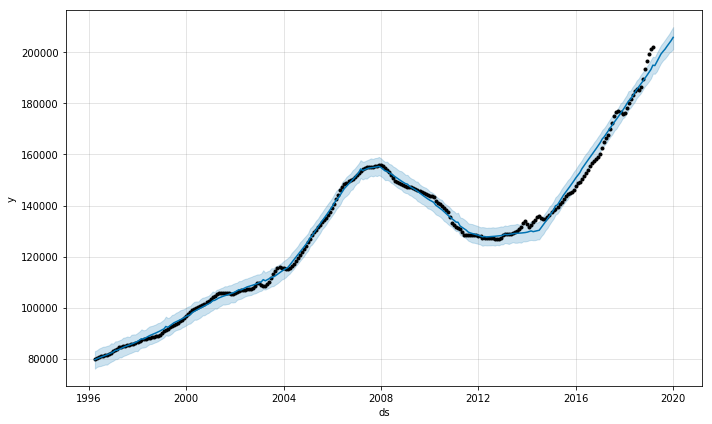

INTERPRET


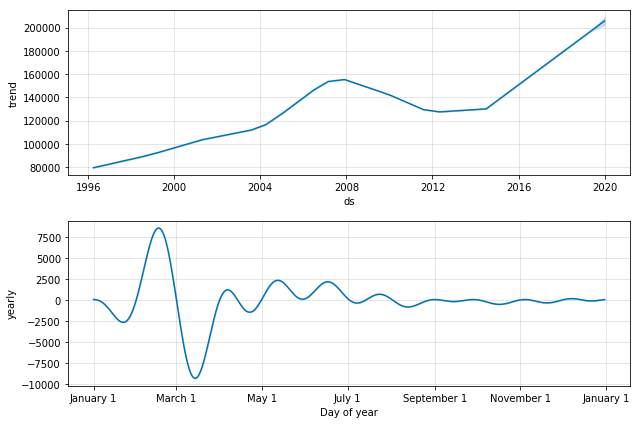

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albany-Schenectady-Troy Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  210127.720215  207503.296546  213068.262448
282 2019-09-30  210834.637711  207961.546759  213989.022691
283 2019-10-31  211292.299427  208242.967136  214681.458405
284 2019-11-30  211418.262818  208061.626830  215300.013002
285 2019-12-31  211431.203263  207769.473401  215565.520389


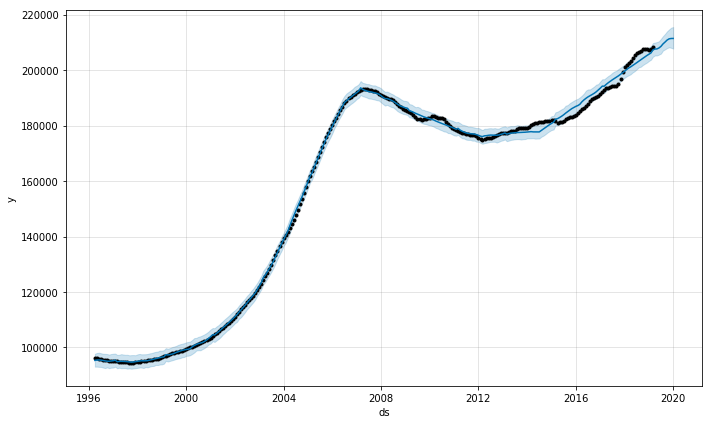

INTERPRET


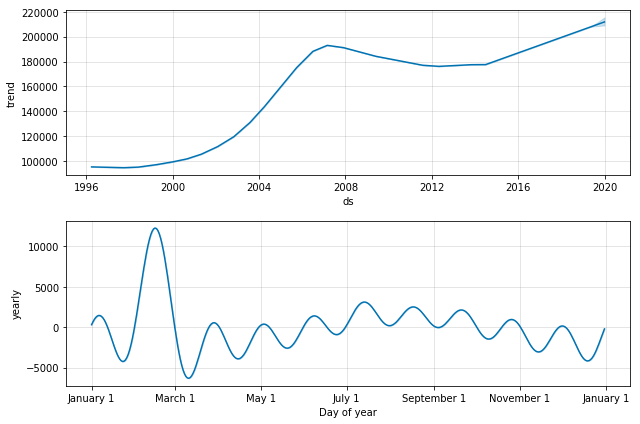

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albemarle Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  178539.998815  174352.990784  182512.742460
282 2019-09-30  179106.829669  174917.634142  183527.163833
283 2019-10-31  179971.685436  175567.098695  184295.828004
284 2019-11-30  180525.709672  176182.897363  185277.319247
285 2019-12-31  181092.624140  175912.520202  185880.624370


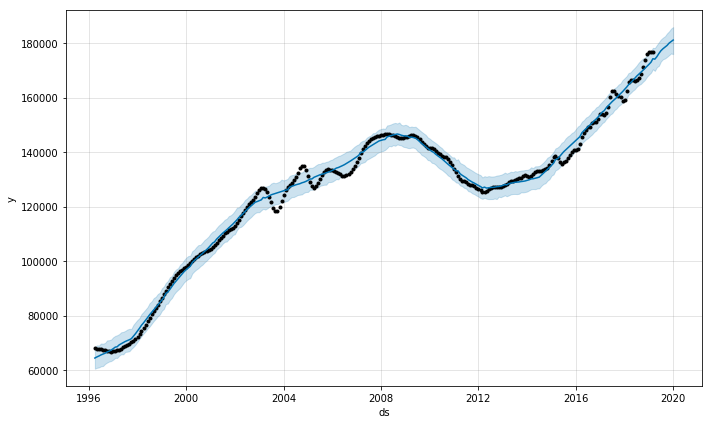

INTERPRET


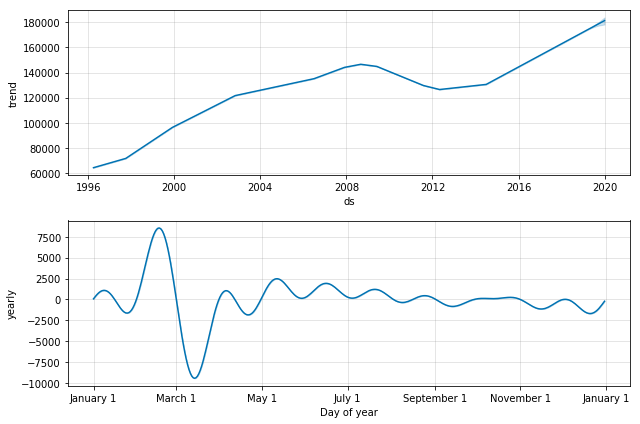

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albert Lea Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  120196.262255  116811.870931  123019.598047
282 2019-09-30  120865.139164  117432.421013  124487.670416
283 2019-10-31  122559.627214  119081.870902  125971.264555
284 2019-11-30  124075.768568  120588.096274  127582.768918
285 2019-12-31  123303.241102  119947.049136  126832.466050


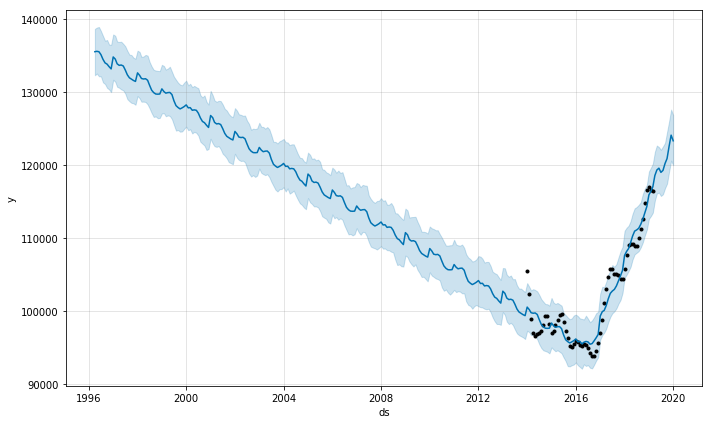

INTERPRET


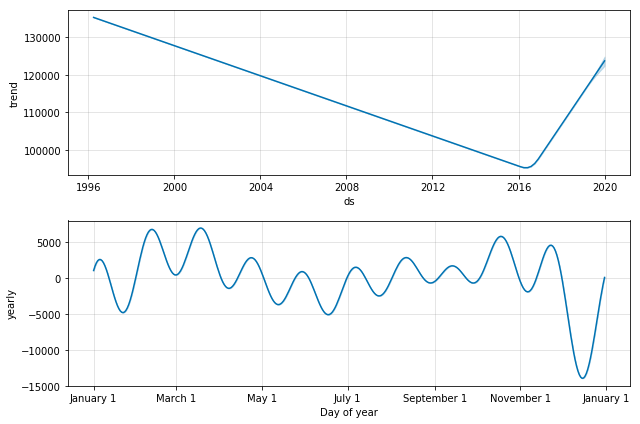

In [19]:
for i in range(10):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albertville Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  90327.535704  66007.593547  113841.623200
282 2019-09-30  90245.932914  69652.263207  113763.568392
283 2019-10-31  90247.953687  66988.785780  113520.980187
284 2019-11-30  90070.450218  66156.549924  112808.248385
285 2019-12-31  89588.675464  66934.908132  111554.035613


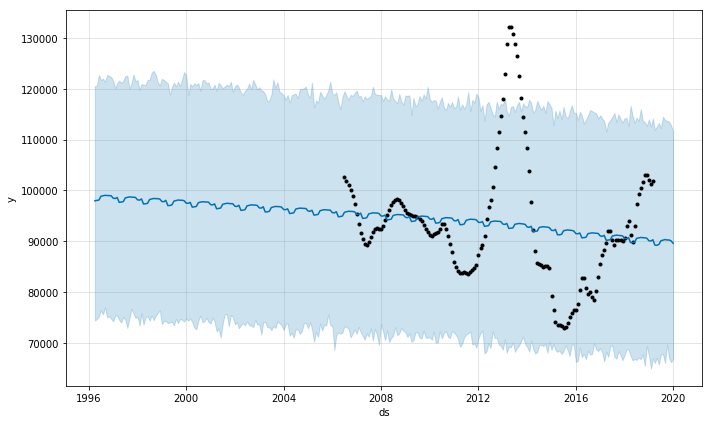

INTERPRET


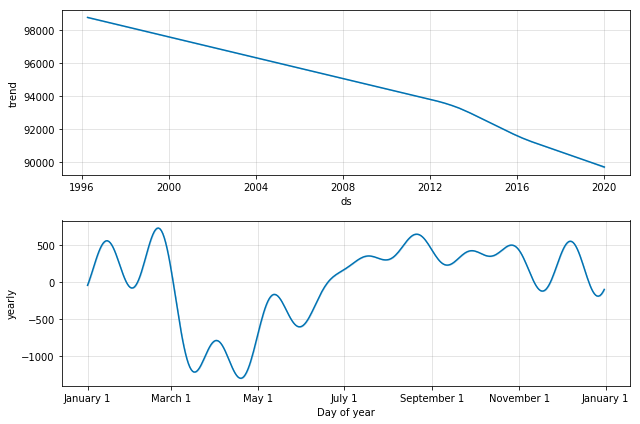

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Allentown-Bethlehem-Easton Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  220456.338535  216200.007619  224779.318220
282 2019-09-30  220972.493491  216584.146271  225216.242408
283 2019-10-31  221969.234575  216746.793476  226269.938468
284 2019-11-30  222789.378850  217413.959452  227487.533936
285 2019-12-31  223221.356007  217417.498102  228286.050029


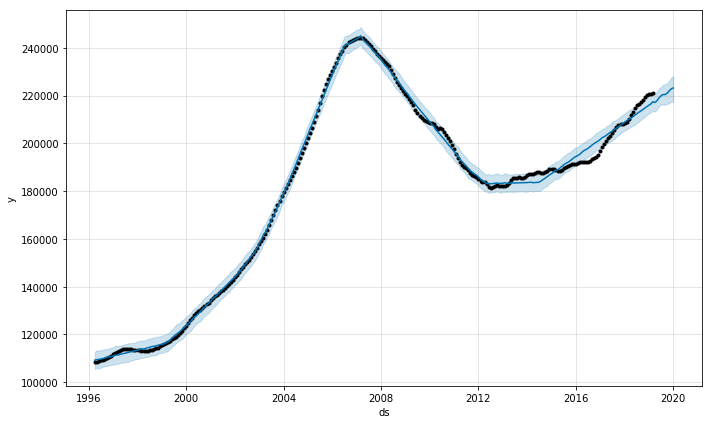

INTERPRET


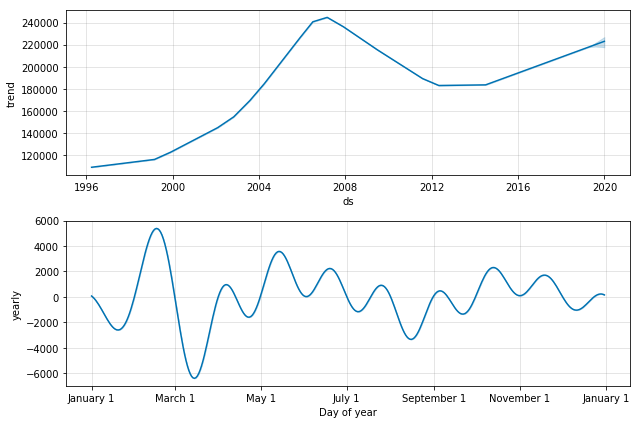

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Amarillo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  153617.692533  151218.426388  156148.958221
282 2019-09-30  154327.563432  151729.021614  157164.623054
283 2019-10-31  155216.019176  152250.316475  158365.334179
284 2019-11-30  155747.417843  152273.498448  159303.382873
285 2019-12-31  156115.568377  152496.912962  160059.037928


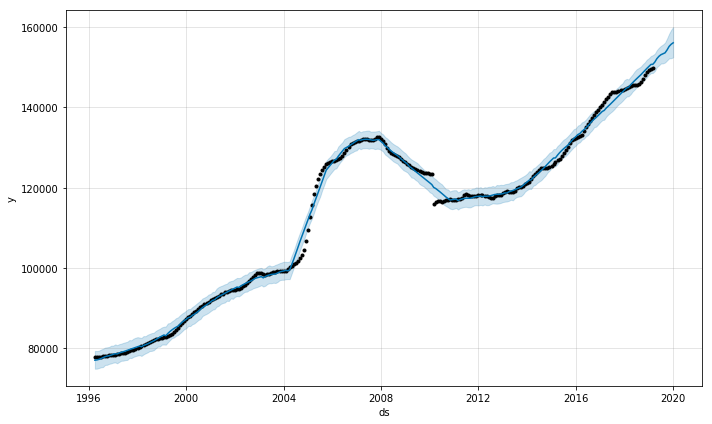

INTERPRET


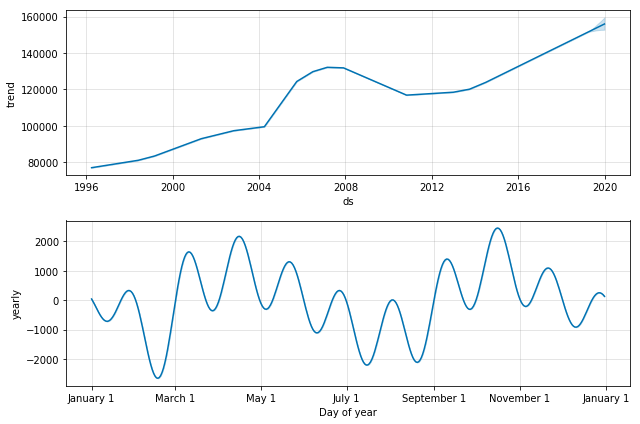

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Angola Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  149797.336176  145801.309789  154176.306499
282 2019-09-30  150539.568784  146455.474368  154708.538604
283 2019-10-31  150985.167193  146976.491931  155001.620987
284 2019-11-30  151542.700928  147273.408844  155918.464225
285 2019-12-31  152585.552869  148476.257894  156969.053972


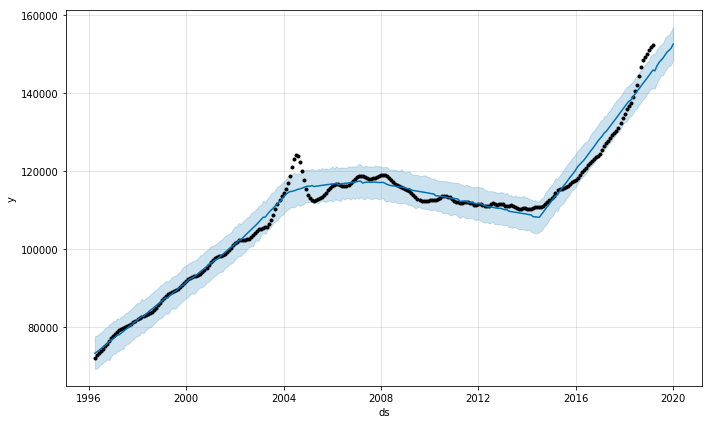

INTERPRET


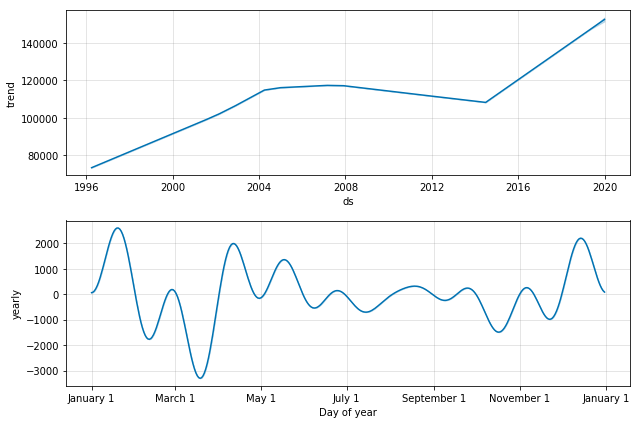

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Arkansas City-Winfield Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  96696.947425  92414.853056  101439.785240
282 2019-09-30  97276.254898  92407.162770  102053.839249
283 2019-10-31  98120.260130  93381.548662  102326.752913
284 2019-11-30  98822.613039  94040.553500  103504.863016
285 2019-12-31  99434.237521  94462.758082  103991.457724


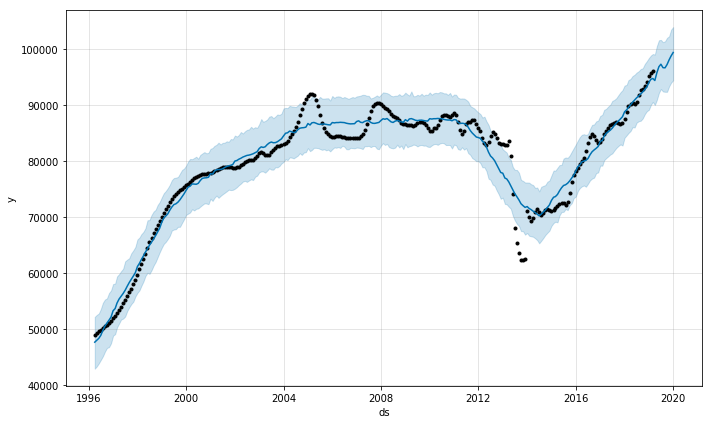

INTERPRET


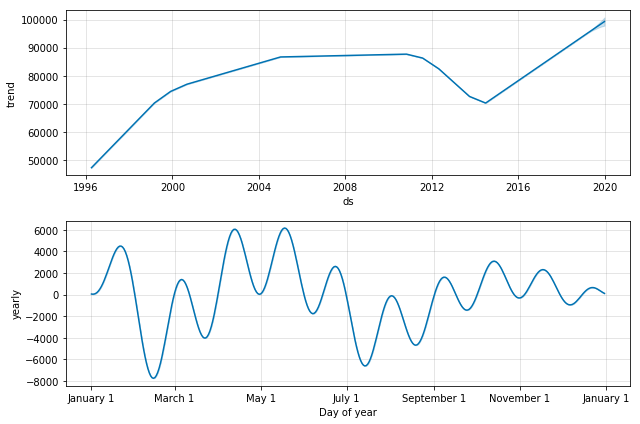

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Atchison Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower    yhat_upper
281 2019-08-31  89557.811481  87174.717100  91970.347104
282 2019-09-30  90003.150311  87459.876766  92516.359861
283 2019-10-31  91376.237998  88888.693185  93837.602003
284 2019-11-30  92357.602938  89665.519267  95047.190045
285 2019-12-31  91949.331897  89461.186182  94443.610041


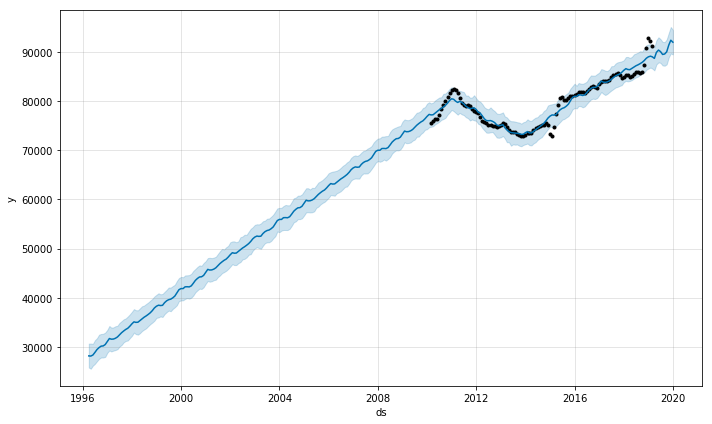

INTERPRET


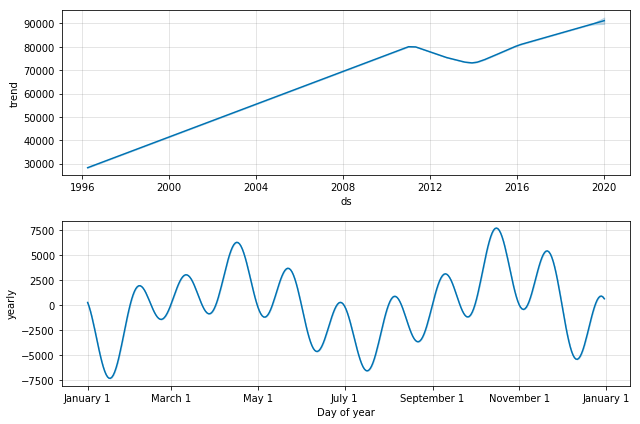

In [20]:
for i in range(10,40,5):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Baraboo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  211176.551399  207624.988089  215074.887300
282 2019-09-30  212124.806223  208273.502608  216339.890059
283 2019-10-31  212528.703920  208526.136887  216657.509735
284 2019-11-30  212869.569495  208719.810390  216865.136272
285 2019-12-31  213252.922324  208335.829266  218018.340853


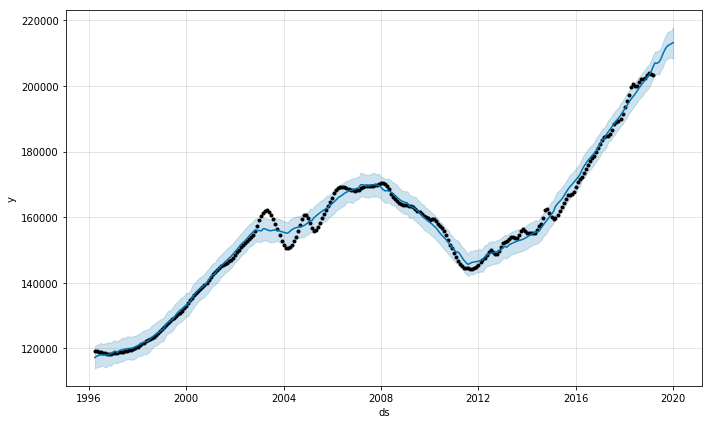

INTERPRET


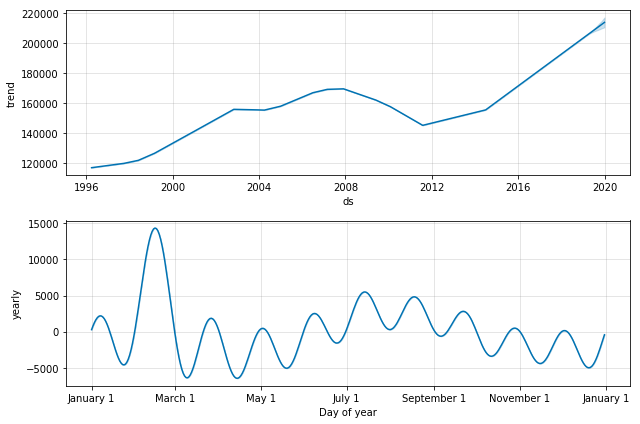

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bastrop Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower    yhat_upper
281 2019-08-31  80975.495078  79731.454554  82169.846233
282 2019-09-30  81346.264676  80084.701279  82602.444957
283 2019-10-31  81582.724756  80250.745886  82784.584656
284 2019-11-30  81797.179553  80475.832195  83085.040183
285 2019-12-31  81975.892237  80589.167998  83404.256918


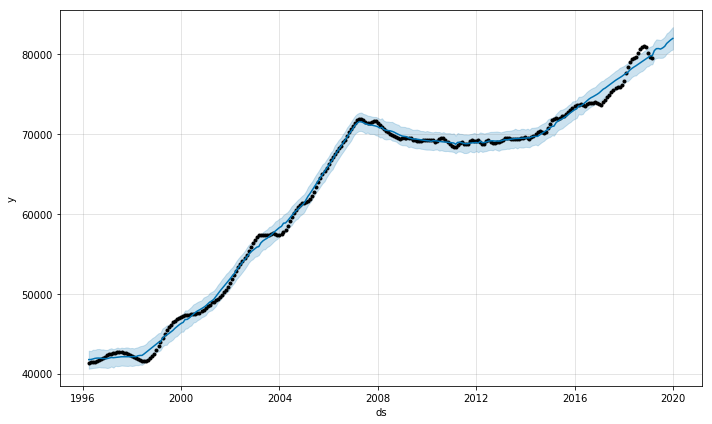

INTERPRET


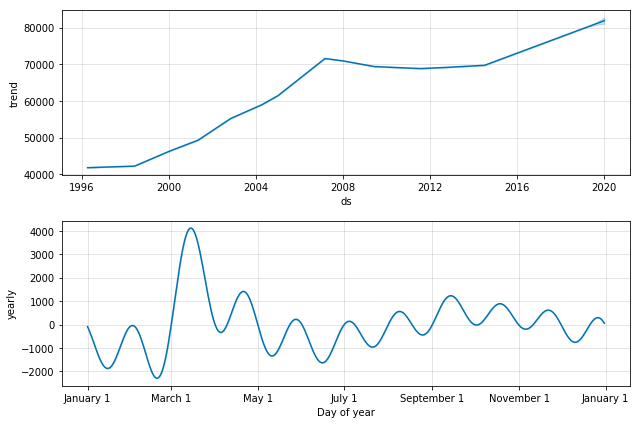

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bay City Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  139160.747280  133806.221673  144066.268779
282 2019-09-30  140218.474506  135052.004163  145882.204521
283 2019-10-31  140569.053801  135111.823445  145784.040613
284 2019-11-30  140787.259647  135916.184531  145871.601760
285 2019-12-31  141123.886898  135819.315745  146808.259018


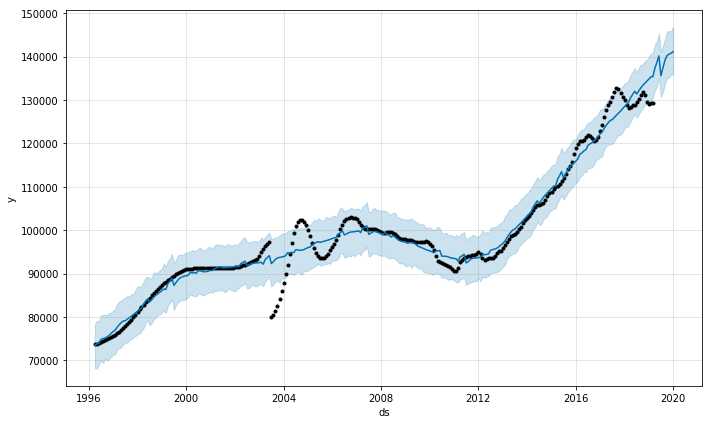

INTERPRET


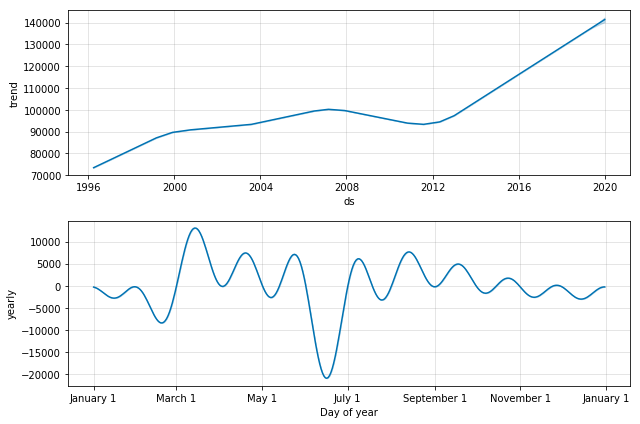

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bedford Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  97410.733693  93155.406244  101337.313337
282 2019-09-30  97944.459865  94043.434326  102270.345335
283 2019-10-31  97957.468567  93681.081456  102163.784485
284 2019-11-30  97790.224635  93511.185538  102136.548945
285 2019-12-31  97824.279493  94093.247756  101770.018953


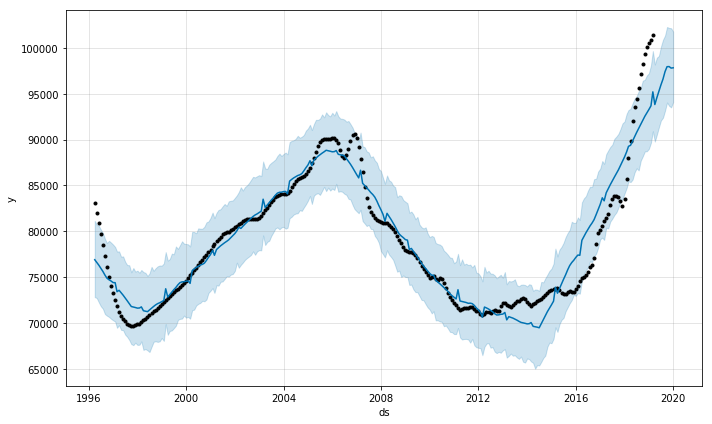

INTERPRET


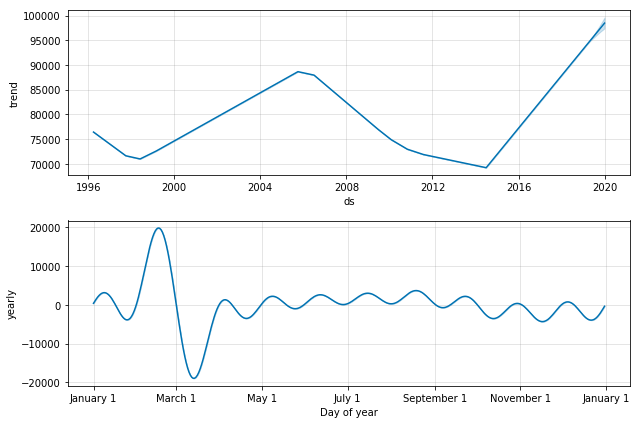

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bend-Redmond Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  417506.352142  405707.631144  429157.756450
282 2019-09-30  419975.553188  403700.617045  434333.977932
283 2019-10-31  423044.983932  401628.259407  442369.090329
284 2019-11-30  425805.786350  401256.243881  447895.492298
285 2019-12-31  427751.471745  397777.439035  453503.405615


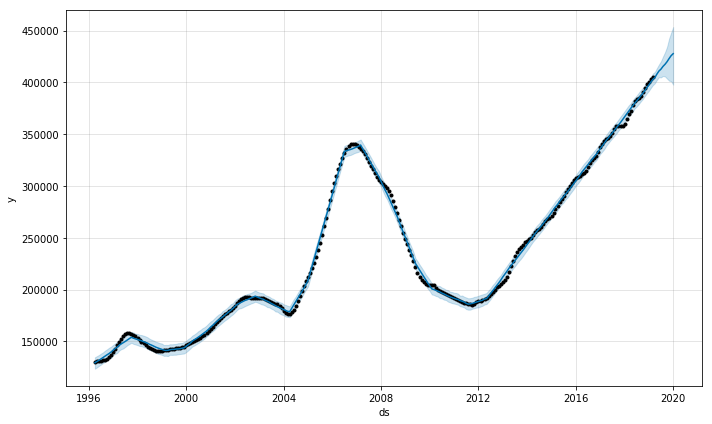

INTERPRET


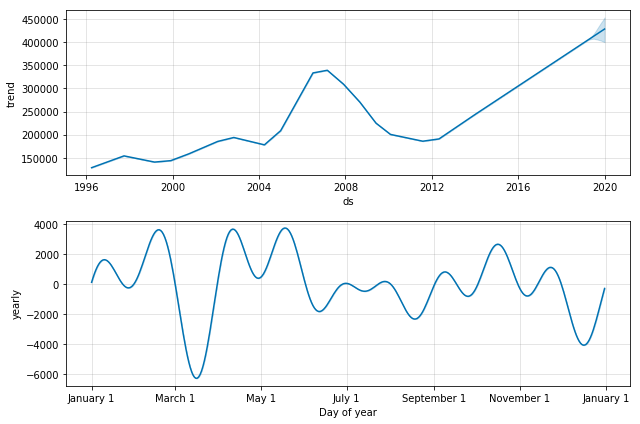

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Birmingham-Hoover Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  188090.868792  186014.172002  190464.588628
282 2019-09-30  188683.723879  186394.976413  191045.057292
283 2019-10-31  189156.870611  186780.898388  191556.855567
284 2019-11-30  189573.245267  186992.605602  192167.826402
285 2019-12-31  190210.306552  187462.905880  193238.493415


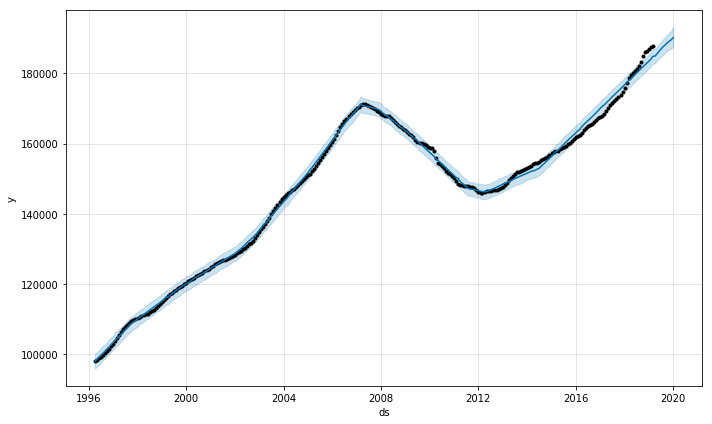

INTERPRET


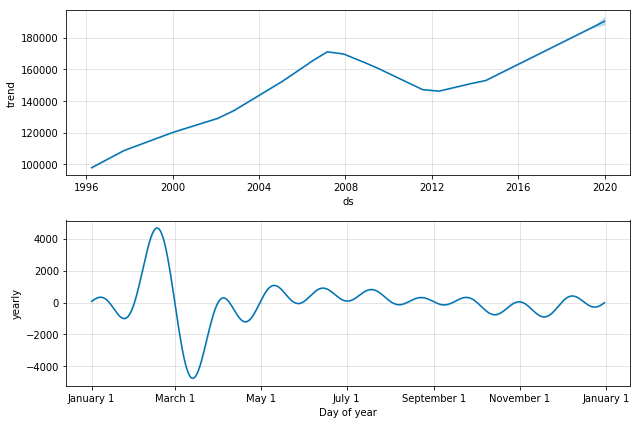

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bloomsburg-Berwick Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  134413.000152  132446.046284  136425.796542
282 2019-09-30  135269.622316  133011.477514  137329.755584
283 2019-10-31  135616.052931  133467.178840  137978.162468
284 2019-11-30  135708.498493  133145.761905  137973.615595
285 2019-12-31  135747.799603  133356.724311  138005.392244


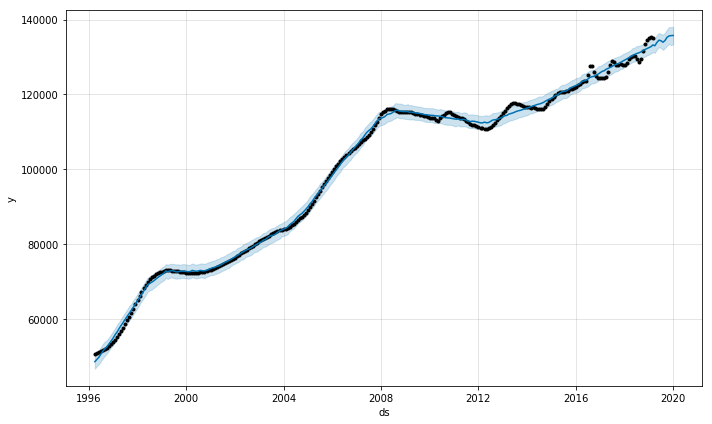

INTERPRET


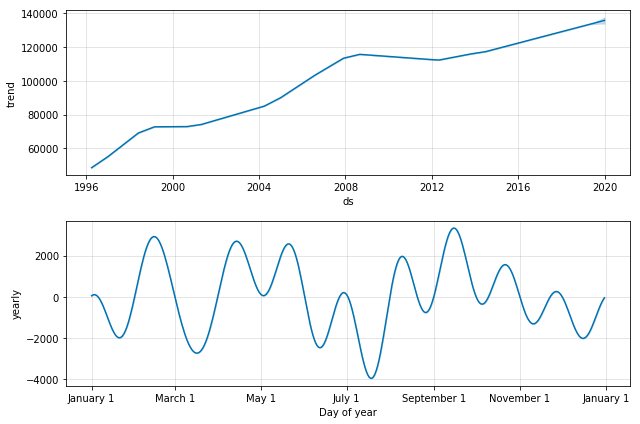

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Boone Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  213957.907816  208059.278878  220071.475959
282 2019-09-30  214478.425420  208215.121151  220289.777189
283 2019-10-31  214600.618870  208140.300173  221184.610824
284 2019-11-30  215053.849096  207060.856798  221566.045320
285 2019-12-31  216920.951388  209107.624817  223770.206920


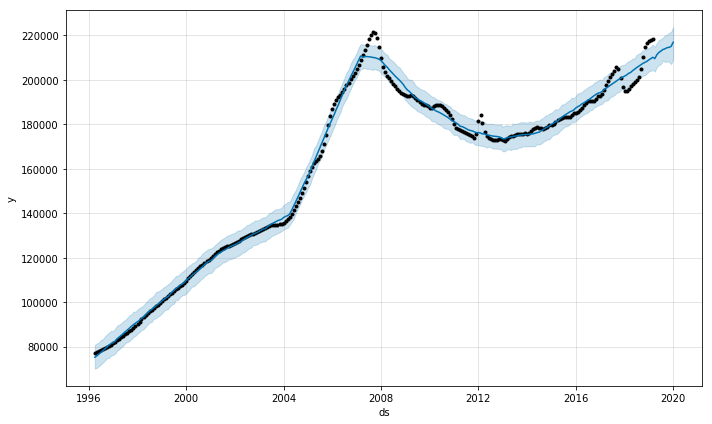

INTERPRET


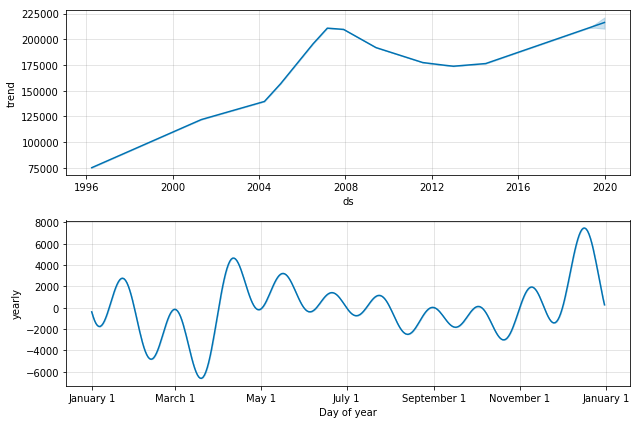

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bozeman Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  376362.256954  369929.911910  383481.868458
282 2019-09-30  379480.669463  372376.899353  386862.080394
283 2019-10-31  382135.413299  374591.790362  389725.129359
284 2019-11-30  384058.373688  376515.492307  392189.422652
285 2019-12-31  385281.426091  376507.364933  394218.399119


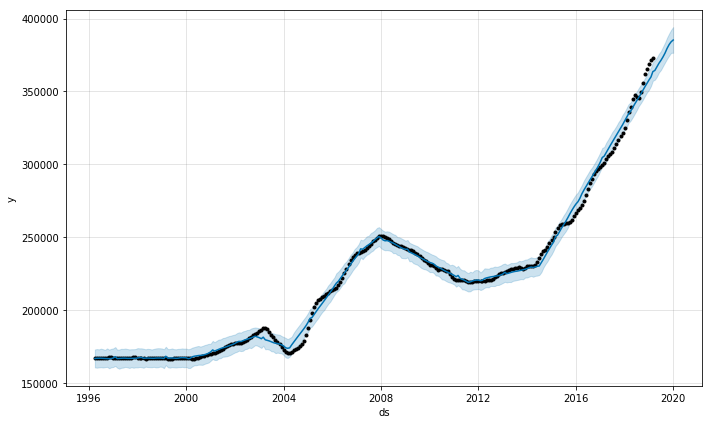

INTERPRET


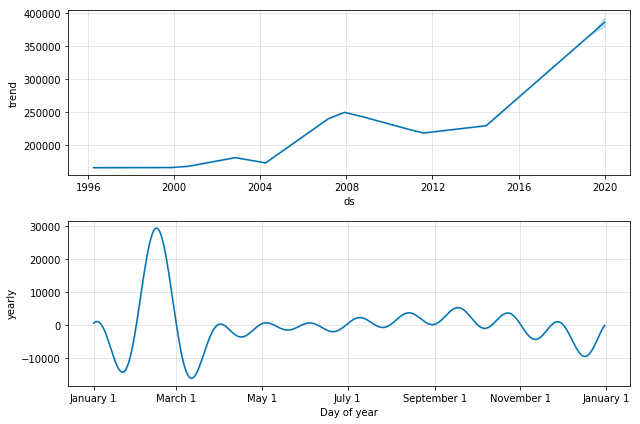

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Brenham Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  197214.866024  194842.830640  199474.748946
282 2019-09-30  198080.912494  195692.714171  200437.917087
283 2019-10-31  199081.168900  196624.254229  201684.630024
284 2019-11-30  200094.302965  197598.287517  202775.219848
285 2019-12-31  201465.963361  198779.800906  204575.608087


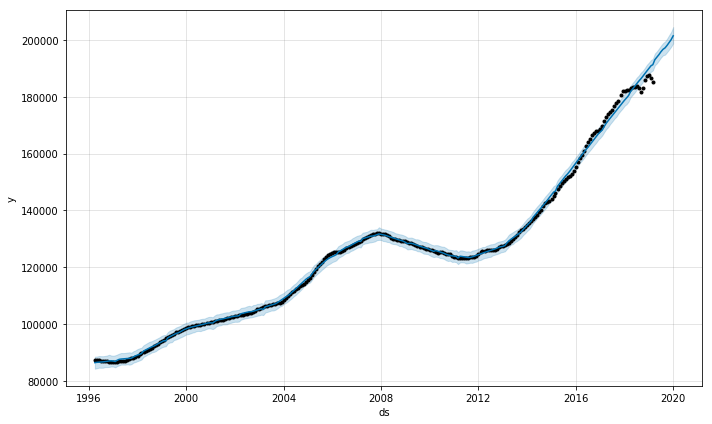

INTERPRET


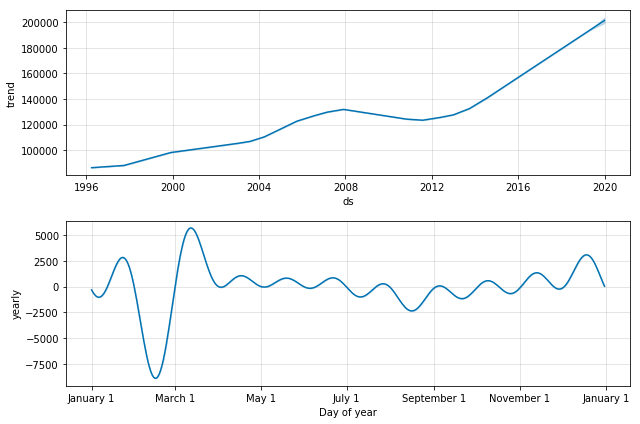

In [21]:
for i in range(50,100,5):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


############################################################
Hot Springs Metro
############################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  148369.249465  144449.294307  152385.604588
282 2019-09-30  149377.395433  145423.449375  153550.321478
283 2019-10-31  150060.541750  145987.384422  153948.235152
284 2019-11-30  149955.886740  145948.061836  154358.492886
285 2019-12-31  149704.469413  145524.821358  154051.499206


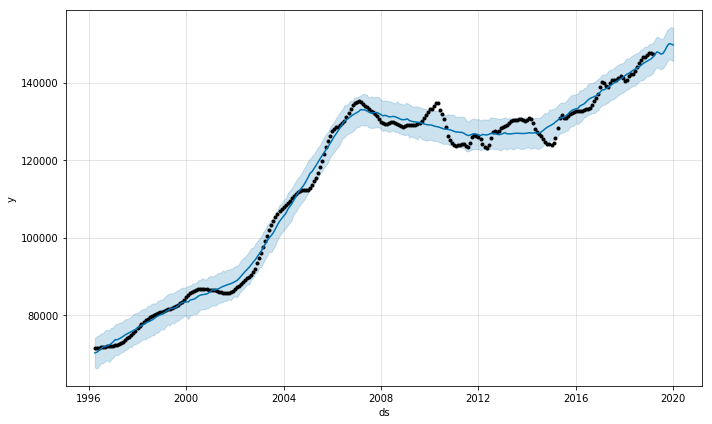

INTERPRET


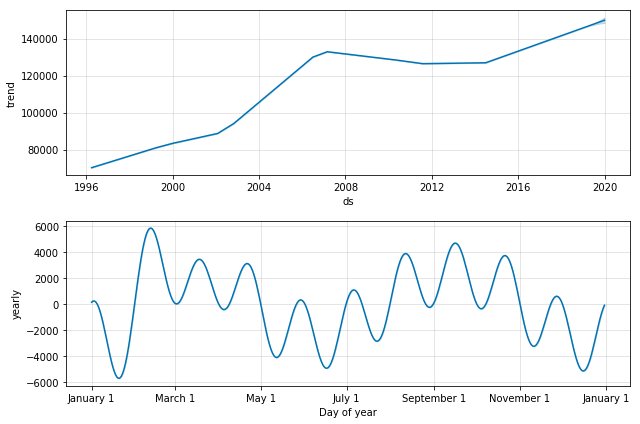

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


############################################################
Little Rock-North Little Rock-Conway Metro
############################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  169722.326276  168017.560858  171332.922196
282 2019-09-30  170212.385254  167937.196321  171991.692756
283 2019-10-31  170699.233825  168182.175188  172714.957068
284 2019-11-30  171111.708588  168248.987647  173528.961717
285 2019-12-31  171591.426592  168391.556458  173952.181959


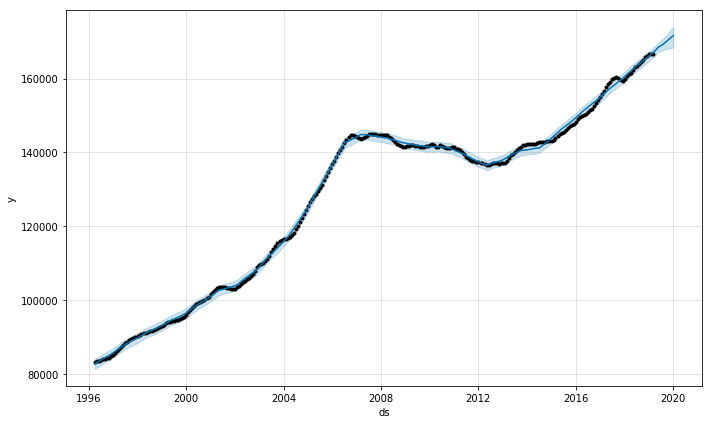

INTERPRET


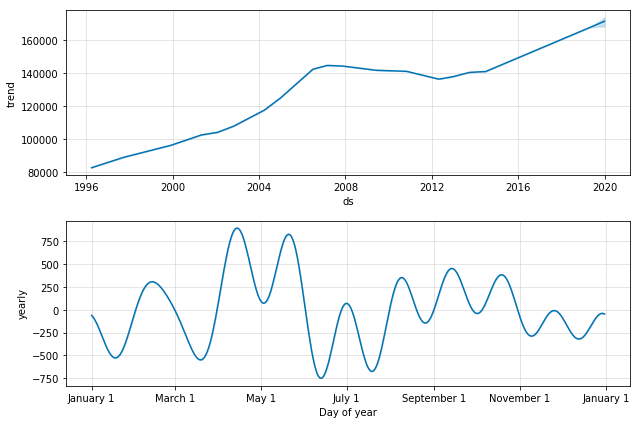

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


############################################################
Fayetteville Metro
############################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  133381.022921  130910.244925  135838.702098
282 2019-09-30  134290.133492  131681.913942  136641.676011
283 2019-10-31  134966.649321  132383.873132  137539.848504
284 2019-11-30  134893.327464  132401.034653  137691.397286
285 2019-12-31  134283.777017  131516.350654  136930.826010


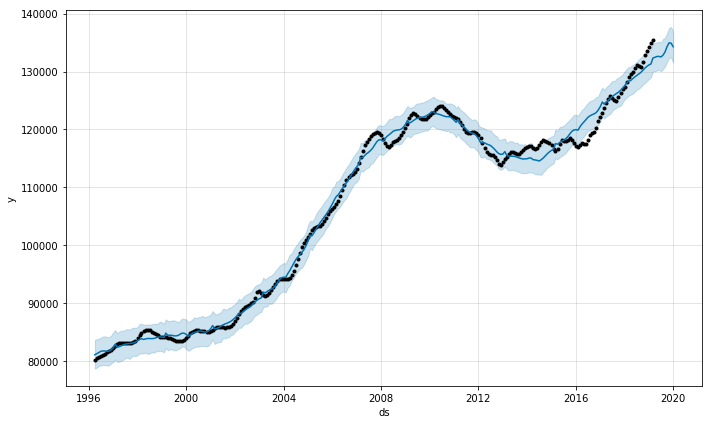

INTERPRET


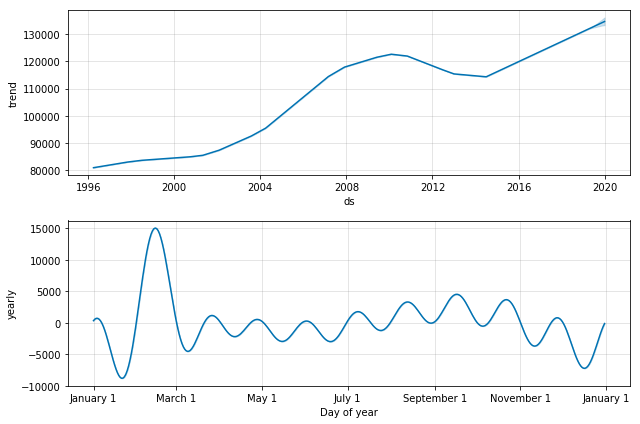

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


############################################################
Searcy Metro
############################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  103864.216924  101472.856977  106221.735905
282 2019-09-30  104198.180413  101709.327382  106599.283086
283 2019-10-31  104621.463245  102093.659228  106989.917637
284 2019-11-30  104865.159056  102228.969492  107340.874041
285 2019-12-31  104212.359958  101564.586923  106630.190458


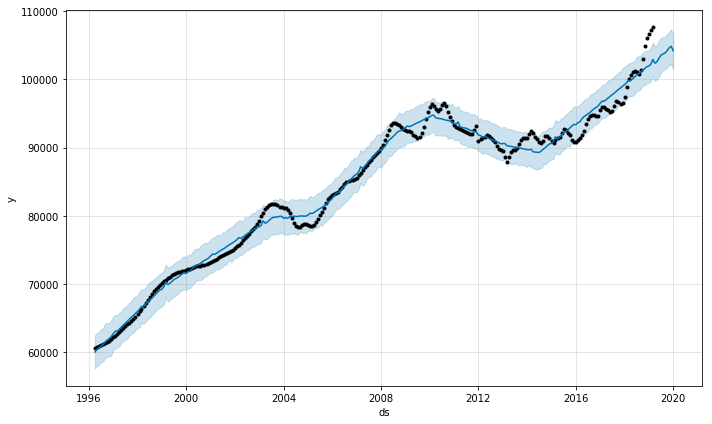

INTERPRET


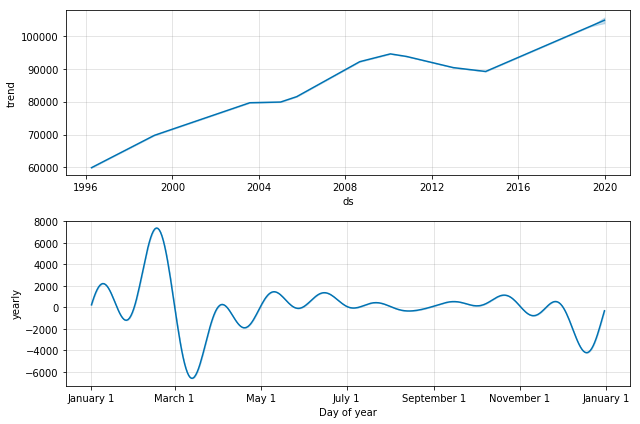

In [23]:
## Metro in Arcansas

ark_metro = ['Hot Springs', 'Little Rock-North Little Rock-Conway', 'Fayetteville', 'Searcy']


for met in ark_metro:
  print("#"*60)
  print("{} Metro".format(met))
  print("#"*60)
  run_prophet(df_metro[df_metro['Metro']== met])
 